# Species interactions

* Species interactions
  * consumer-resource interactions
    * MacArthur's theory/models
      * Predator-prey & competition (one prey two predators) - rosenzweig-MacArthur (VJ)
      * Bacterial-substrate (1 batceria - 1 or many substrates , two bacteria and 1 or more resources) - MiCrM 
 * The Lotka-Volterra equations
    * Every LV system is "effective" (derivation from MacArthur's models / MiCrM)
      * Normal form?
    * Competition and Mutualism 
    * Bifurcations (VJ) 
  * Evolutionary dynamics?
  * Stochasticity?
  * Applications/Examples


## Introduction
consumers "live to eat" and "eat to live." They are heterotrophs that harvest energy from other organisms, such as tigers, or from organic sources, such as bacteria. As Ludwig Boltzmann noted in 1886:

> "The struggle for existence of living beings is not for the fundamental constituents of food, but for the possession of the free energy obtained, chiefly by means of the green plant, from the transfer of radiant energy from the hot sun to the cold earth."

consumer-resource interactions play a crucial role in the flow of energy through ecosystems. The metabolic theory of ecology provides a foundation for understanding these interactions, linking individual metabolic processes to population and ecosystem dynamics.



## Energy, Metabolism, and Consumption
All living organisms must maintain an energy balance:

$$
\text{Energy Consumed} = \text{Energy Used (Maintenance + Growth + Movement)}.
$$

Different organisms allocate energy to maintenance, growth, and movement in varying proportions. To do more than just maintain themselves, organisms must consume energy at a rate faster than their metabolic rate. This requires investment in activities such as foraging, which links energy acquisition to body size. For instance, autotrophs utilize photosynthesis, while heterotrophs depend on consuming organic material.



## Size and Metabolic Needs
resting metabolic rate ($B$) increases with body size ($M$) following a power-law relationship:

$$
B = B_0 M^b,
$$

where $B_0$ is a normalization constant and $b$ is the scaling exponent, typically around $3/4$. Larger organisms have higher absolute metabolic rates but lower mass-specific rates:

$$
\frac{B}{M} = B_0 M^{b-1}.
$$

This relationship implies that larger organisms need to consume more energy overall but are more efficient per unit of body mass. This efficiency has significant implications for energy flow in ecosystems, as larger consumers typically occupy higher trophic levels and have lower population densities.



### Biomechanical Implications of Size
Size also affects biomechanics and interactions with the physical environment. As Haldane (1926) observed:

> "You can drop a mouse down a thousand-yard mine shaft; and, on arriving at the bottom, it gets a slight shock and walks away, provided that the ground is fairly soft. A rat is killed, a man is broken, a horse splashes."

Size influences how organisms move, forage, and interact with resources, ultimately affecting their consumption rates. Smaller organisms, for example, often forage faster but consume smaller amounts per event, while larger organisms are slower but consume larger quantities.



## Dissecting consumer-resource interactions
Components of consumer-resource interactions determine consumption rate ($c$):

$$
 c = \frac{ar}{1 + ahr},
$$

where $a$ is the search rate, $r$ is resource density, and $h$ is handling time. This is known as the Type II functional response, where resource handling dominates at high resource densities, while searching dominates at low densities.

These interactions are further influenced by environmental factors, such as temperature and resource availability, which alter the rates of searching and handling.



## Predicting consumer-resource interactions
Key components of consumer-resource interactions scale with size:
- Velocity and detection distance increase with consumer size.
- Handling time decreases with size.
- Consumption rate scales positively with size and interaction dimensionality (e.g., 2D vs. 3D).

For example, in 3D environments like oceans, consumption rates scale more steeply with size compared to 2D environments. Studies have shown that aquatic predators exhibit 10x higher consumption rates at a given size compared to terrestrial predators due to the higher dimensionality of their interaction space.


#
# Temperature and consumer-resource interactions
Temperature affects interaction components via the Boltzmann-Arrhenius equation:

$$ k = A e^{-\frac{E_a}{k_B T}}, $$

where $k$ is the reaction rate, $A$ is a constant, $E_a$ is activation energy, $k_B$ is Boltzmann's constant, and $T$ is temperature. Higher temperatures generally increase foraging velocity and reduce handling time, leading to higher consumption rates. For example, ectothermic organisms show a strong temperature dependence in their foraging activities, while endotherms have a more stable consumption rate due to thermal regulation.



## consumer-resource Dynamics & MacArthur's theory 

The logistic model primarily focuses on the intrinsic dynamics of a species, which are influenced by a variety of factors. To enhance the accuracy and comprehensiveness of the model, we incorporate the effects of predators (consumers) on the population dynamics of the species:

$$
\begin{aligned}
&\frac{dN}{dt} = r_m N \left(1 - \frac{N}{K}\right) - aNC,\\
&\frac{dC}{dt} = eaNC - zC.
\end{aligned}
$$

As illustrated, we have modified the initial logistic model by introducing the term $ -aNC $, and we have incorporated a new equation, $ \frac{dC}{dt} $, to describe the dynamics of the predator population. In the new modeal, $r_m$ is the resource's maximum growth rate, $K$ is carrying capacity, $a$ is search rate, $e$ is conversion efficiency (the ability to convert energy into growth), and $z$ is mortality rate. This refined model is MacArthur Model.


P.S. These parameters may also depend on size and temperature, linking individual metabolism to population-level outcomes. Additionally, such models help explain phenomena like population cycles and the effects of environmental changes on consumer-resource interactions.



## Summary
- Metabolic rate and biomechanics shape species' consumer-resource interactions and consumption rates.
- Size, temperature, and dimensionality influence these interactions.
- Models incorporating metabolic constraints can predict population dynamics and ecological patterns.
- Understanding these principles provides insights into energy flow and stability in ecosystems.



## Discussion Questions

1. What are the main advantages of a consumer (heterotrophic) lifestyle compared to an producer (autotrophic) one? What are the disadvantages?
2. Which is the most common and diverse organisms on planet earth ? Why? Think in terms of what type of consumer they are, and what their size is.
3. What is the largest consumer on Earth? What is the smallest? In what respects is their “struggle for existence” similar? In what respects is it different?
4. Which consumer(s) on earth operate(s) at the hottest temperatures? Which operate at the coldest? How is their “struggle for existence” similar or different?

## Simulation Code

Let simulate the model by Python! The parameters are given as below.


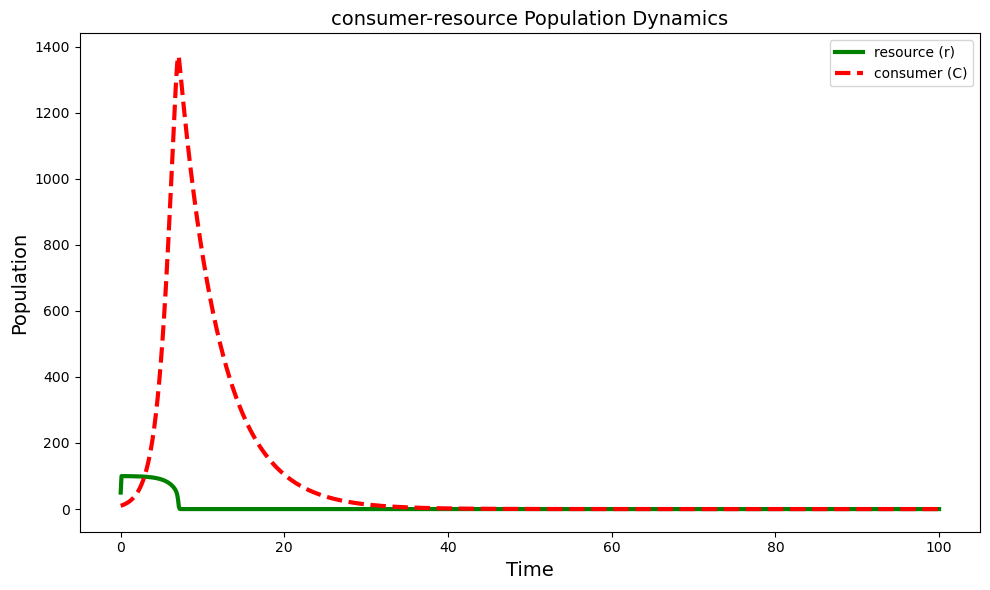


Final state (t=100.0):
resource: -0.00
consumer: 0.00

Theoretical equilibrium point:
r*: 20.00
C*: 40.00


In [2]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Define model parameters
params = {
    'r': 1.0,    # resource growth rate
    'K': 100.0,  # Environmental carrying capacity
    'a': 0.02,   # Predation rate
    'w': 0.5,    # resource conversion efficiency
    'm': 0.2     # consumer death rate
}

def model(state, t, r, K, a, w, m):
    """
    Differential equations for the consumer-resource model.
    state[0]: r (resource quantity)
    state[1]: C (consumer quantity)
    """
    r, C = state
    
    # resource equation: dr/dt = rr(1-r/K) - arC
    drdt = r * r * (1 - r/K) - a * r * C
    
    # consumer equation: dC/dt = C(war - m)
    dCdt = C * (w * a * r - m)
    
    return [drdt, dCdt]

# Time series
t = np.linspace(0, 100, 1000)

# Initial conditions
r0 = 50.0  # Initial resource quantity
C0 = 10.0  # Initial consumer quantity
state0 = [r0, C0]

# Solve the differential equations
solution = odeint(model, state0, t, args=(params['r'], params['K'], 
                                         params['a'], params['w'], 
                                         params['m']))

# Plotting
plt.figure(figsize=(10, 6))

# Time series plot
plt.plot(t, solution[:, 0], 'g-', linewidth=3, label='resource (r)')
plt.plot(t, solution[:, 1], 'r--', linewidth=3, label='consumer (C)')  # Changed to dashed line
plt.legend()
plt.xlabel('Time', fontsize=14)  # Adjusted font size
plt.ylabel('Population', fontsize=14)  # Adjusted font size
plt.title('consumer-resource Population Dynamics', fontsize=14)  # Adjusted font size

plt.tight_layout()
plt.show()

# Print steady state values (if they exist)
final_state = solution[-1]
print(f"\nFinal state (t={t[-1]}):")
print(f"resource: {final_state[0]:.2f}")
print(f"consumer: {final_state[1]:.2f}")

# Calculate equilibrium points of the system
# Non-trivial equilibrium satisfies:
# 1) 0 = rr(1-r/K) - arC
# 2) 0 = C(war - m)

# From the second equation, either C = 0 or r = m/(wa)
r_eq = params['m']/(params['w'] * params['a'])
if r_eq < params['K']:
    C_eq = (params['r']/params['a']) * (1 - r_eq/params['K'])
    print("\nTheoretical equilibrium point:")
    print(f"r*: {r_eq:.2f}")
    print(f"C*: {C_eq:.2f}")
else:
    print("\nNo feasible non-trivial equilibrium exists")



## Consumer-Resource Model (CRM):

If we want to expand the explanation of MacArthur model, let's treat prey as a resource and predators as consumers. So, we replace the $N$ in the model with $r$. Also, to avoid any misunderstanding about the parameters, we replaced some notations. Now the model is shown as below:

$$
\begin{aligned}
&\frac{dR}{dt} = r R \left(1 - \frac{R}{K}\right) - aRC,\\
&\frac{dC}{dt} = wRC - mC.
\end{aligned}
$$


The MacArthur model is typically used to describe interactions between a single consumer population and a single resource population. How can we expand it to multiple resources and multiple consumers? There are following two points we need to consider：


- Multiple resources: Instead of considering just one resource $ r $, we now consider a set of resources $ R_\alpha $ (for $ \alpha = 1, 2, ..., n $) that interact with the consumers. Thus, in $ \frac{dC}{dt} $, the resource term is updated to $\sum_{\alpha}w_{\alpha}R_{\alpha}C$. Let's add the index for consumer $i$: $\frac{dC_i}{dt} = \sum_{\alpha}w_{i\alpha}R_{\alpha}C_i - m_iC_i$.
  
- Multiple consumers: Each consumer species $ C_i $ may interact with all of the available resources, consuming them at different rates and with different efficiencies. Thus, in $ \frac{dR}{dt} $, the consumer term is updated to $-\sum_{i}a_{i}RC_i$. Let's add the index for resource $\alpha$: $\frac{dR_{\alpha}}{dt}=r_{\alpha} R_{\alpha} \left( 1- \frac{R_{\alpha}}{K_{\alpha}}\right)- \sum_{i}a_{i\alpha}R_{\alpha}C_i$


Let's conbine it write it together:

$$  \begin{aligned}&\frac{dR_\alpha}{dt}=r_\alpha(1-\frac{R_\alpha}{K_\alpha})R_\alpha-\sum_ia_{i\alpha}R_\alpha C_i,\\&\frac{dC_i}{dt}=C_i\left[\sum_\alpha w_{i\alpha} R_\alpha-m_i\right]\end{aligned}  $$

where:
- $ r_\alpha $: Maximum growth rate of resource $ \alpha $.
- $ K_\alpha $: Carrying capacity of resource $ \alpha $, representing the maximum sustainable population size.
- $ a_{i\alpha} $: Interaction coefficient representing the rate at which consumer $ i $ consumes resource $ \alpha $.
- $ w_{i\alpha} $: Conversion efficiency, indicating how efficiently resource $ \alpha $ supports consumer $ i $'s growth.
- $ m_i $: mortality rate of consumer $ i $, representing natural death and other forms of population loss.

### Detailed explanation:

Resource Dynamics ($ \frac{dR_\alpha}{dt} $):
- The first term $ r_\alpha R_\alpha \left(1 - \frac{R_\alpha}{K_\alpha}\right) $ describes the logistic growth of resource $ \alpha $. $ r_\alpha$ is the intrinsic growth rate of resource $ \alpha $. This term models the growth of resources up to a maximum carrying capacity $ K_\alpha $, where density-dependent effects reduce the per-capita growth rate as resource abundance $ R_\alpha $ approaches the carrying capacity $ K_\alpha $.
- The second term $ - \sum_i a_{i\alpha} R_\alpha C_i $ represents the consumption of resource $ \alpha $ by all consumers (sum of $i$). It reflects the depletion of resources due to consumption by all consumers.

Consumer Dynamics ($ \frac{dC_i}{dt} $):
- $ C_i \left[\sum_\alpha w_{i\alpha} R_\alpha - m_i\right] $ governs the change in consumer $ i $'s population.
- $ \sum_\alpha w_{i\alpha} R_\alpha $ calculates the net growth rate of consumer $ i $ considering all resources (sum of $ \alpha $) it consumes, weighted by $ w_{i\alpha} $, which represents the efficiency of resource $ \alpha $ in supporting consumer $ i $'s growth.
- $ m_i $ represents the mortality rate of consumer $ i $, affecting its population dynamics by reducing $ C_i $.

### Model Insights:

Metabolic Basis: The model integrates metabolic rates (through $ a_{i\alpha} $, $ w_{i\alpha} $, $ m_i $) to predict consumer-resource interactions. These parameters link individual-level processes (metabolism, consumption) to population-level outcomes (population dynamics, ecological stability).

Environmental Effects: Changes in environmental factors (like temperature, resource availability) influence $ r_\alpha $, $ K_\alpha $, $ a_{i\alpha} $, and $ w_{i\alpha} $, thereby affecting the stability and dynamics of ecological systems.

Predictive Power: By simulating these interactions, the model can predict population cycles, community structure, and the impact of environmental changes on ecosystems.

### A simple example

Let's assume that there are two resources and two consumers.

For resource 1:

$$\frac{dR_1}{dt}=r_1\left(1-\frac{R_1}{K_1}\right)R_1-\left(a_{11}R_1 C_1 +a_{21}R_1 C_2\right)$$


For resource 2:


$$\frac{dR_2}{dt}=r_2\left(1-\frac{R_2}{K_2}\right)R_2-\left(a_{12}R_2 C_1 +a_{22}R_2 C_2\right)$$


For consumer 1:

$$\frac{dC_1}{dt}=C_1\left(w_{11} R_1+w_{12} R_2-m_1\right) $$


For consumer 2:


$$\frac{dC_2}{dt}=C_2\left(w_{21} R_1+w_{22} R_2-m_2\right) $$

### Simulation Code

Let simulate the model by Python! The parameters are given as below.

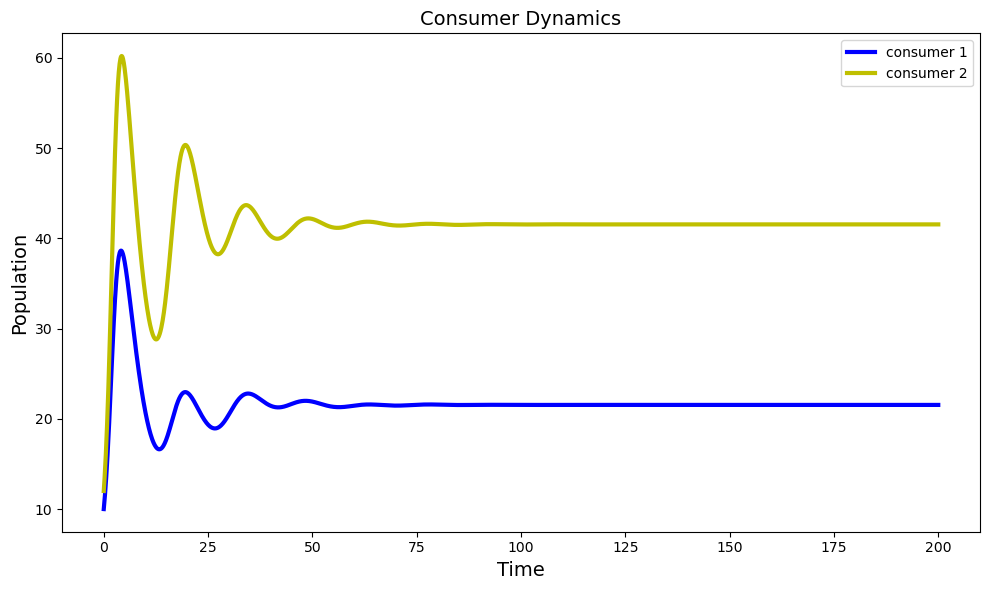


Final state (t=200.0):
Final population of Resource 1: 15.38
Final population of Resource 2: 15.38
Final population of Consumer 1: 21.54
Final population of Consumer 2: 41.54


In [4]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Define model parameters
params = {
    # resource growth rates
    'r1': 1.0,
    'r2': 1.2,
    
    # Environmental carrying capacities
    'K1': 100.0,
    'K2': 120.0,
    
    # Predation rate matrix a[i,j] represents the predation rate of consumer i on resource j
    'a': np.array([
        [0.02, 0.01],  # consumer 1's predation rate on resource 1 and resource 2
        [0.01, 0.02]   # consumer 2's predation rate on resource 1 and resource 2
    ]),
    
    # resource conversion efficiency matrix w[i,j] represents the efficiency of consumer i converting resource j
    'w': np.array([
        [0.5, 0.3],    # consumer 1's conversion efficiency for resource 1 and resource 2
        [0.3, 0.5]     # consumer 2's conversion efficiency for resource 1 and resource 2
    ]),
    
    # consumer mortality rates
    'm1': 0.2,
    'm2': 0.2
}

def model(state, t, params):
    """
    Differential equations for a two-consumer, two-resource model.
    state: [r1, r2, C1, C2]
    """
    r1, r2, C1, C2 = state
    
    # Equation for resource 1
    dr1dt = params['r1'] * r1 * (1 - r1/params['K1']) - \
            (params['a'][0,0]*C1 + params['a'][1,0]*C2) * r1
    
    # Equation for resource 2
    dr2dt = params['r2'] * r2 * (1 - r2/params['K2']) - \
            (params['a'][0,1]*C1 + params['a'][1,1]*C2) * r2
    
    # Equation for consumer 1
    dC1dt = C1 * (params['w'][0,0]*params['a'][0,0]*r1 + \
                  params['w'][0,1]*params['a'][0,1]*r2 - params['m1'])
    
    # Equation for consumer 2
    dC2dt = C2 * (params['w'][1,0]*params['a'][1,0]*r1 + \
                  params['w'][1,1]*params['a'][1,1]*r2 - params['m2'])
    
    return [dr1dt, dr2dt, dC1dt, dC2dt]

# Time series
t = np.linspace(0, 200, 2000)

# Initial conditions
r1_0 = 50.0  # Initial quantity of resource 1
r2_0 = 60.0  # Initial quantity of resource 2
C1_0 = 10.0  # Initial quantity of consumer 1
C2_0 = 12.0  # Initial quantity of consumer 2
state0 = [r1_0, r2_0, C1_0, C2_0]

# Solve the differential equations
solution = odeint(model, state0, t, args=(params,))

# Plotting
plt.figure(figsize=(10, 6))

# Time series plot
# plt.plot(t, solution[:, 0], 'g--', linewidth=3, label='resource 1')  
# plt.plot(t, solution[:, 1], 'r--', linewidth=3, label='resource 2')  
plt.plot(t, solution[:, 2], 'b-', linewidth=3, label='consumer 1') 
plt.plot(t, solution[:, 3], 'y-', linewidth=3, label='consumer 2') 

plt.legend()
plt.xlabel('Time', fontsize=14)  # Adjust font size
plt.ylabel('Population', fontsize=14)  # Adjust font size
# plt.title('consumer-resource Population Dynamics', fontsize=14)  # Adjust font size
plt.title('Consumer Dynamics', fontsize=14)  # Adjust font size

plt.tight_layout()
plt.show()

# Print final state
final_state = solution[-1]
print(f"\nFinal state (t={t[-1]}):")
print(f"Final population of Resource 1: {final_state[0]:.2f}")
print(f"Final population of Resource 2: {final_state[1]:.2f}")
print(f"Final population of Consumer 1: {final_state[2]:.2f}")
print(f"Final population of Consumer 2: {final_state[3]:.2f}")

## Effective Lotka-Volterra (eLV) model

While we can simulate the dynamics of multiple consumers and resources using a consumer-resource model, we cannot intuitively understand the interactions between consumers. It is evident that consumers compete for shared resources within the system, thus the interactions between consumer pairs are mediated by resources. If we can mathematically eliminate the resource term, we can directly obtain the connections between consumers. But how to determine the interactions between different consumers? It is not difficult to find that the consumer-resource model is actually very similar to the Lotka-Volterra (LV) model (which has been introduced in other chapters), and for the LV model, we can calculate it in the form of effective Lotka-Volterra (eLV) to analyze the interaction between $x_i$ and $x_j$. If you are interested in the proof, please refer to the references.

Classic Lotka-Volterra (LV) model:

$$\begin{aligned} &\frac{dx}{dt} = \alpha x - \beta xy,\\ &\frac{dy}{dt} = \delta xy - \gamma y. \end{aligned}$$

Effective Lotka-Volterra (eLV) model:

$$\frac{dx_i}{dt} = x_i \left(   r_i + \sum_j \alpha_{ij} x_j \right),$$

where, $r_i$ is the growth rate coefficient and $\alpha_{ij}$ is the effective interaction coefficient. Similarly, we can calculate the consumer-resource model in the form of eLV:

$$\frac{dC_i}{dt} = C_i \left(   r_i + \sum_j \alpha_{ij} C_j \right),$$

where, $r_i = \sum_\alpha w_{i\alpha} K_\alpha - m_i$, and $\alpha_{ij} = -\sum_\alpha \frac{w_{i\alpha} a_{j\alpha} K_\alpha}{r_\alpha}$. Please read the References if you are interested in the derivation.



### References

[Species packing and competitive equilibrium for many species](https://doi.org/10.1016/0040-5809(70)90039-0)

[A minimal model for microbial biodiversity can reproduce experimentally observed ecological patterns](https://doi.org/10.1038/s41598-020-60130-2)

### Simulation Code

Let's simulate the model by Python! The parameters are given as below.

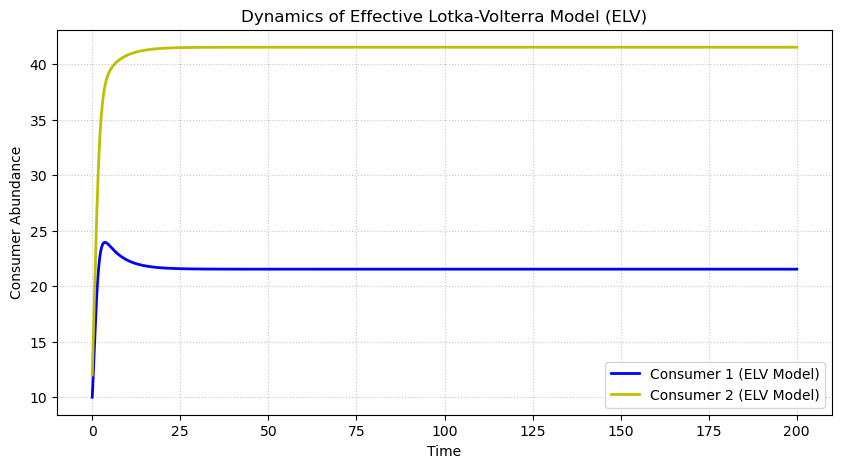

In [ ]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# --- 1. Parameter settings ---
params = {
    'r_vec': np.array([1.0, 1.2]),       # Intrinsic growth rates of resources
    'K_vec': np.array([100.0, 120.0]),   # Carrying capacities of resources
    'a': np.array([                      # Consumption rate matrix (for resource equations)
        [0.02, 0.01],
        [0.01, 0.02]
    ]),
    'w': np.array([                      # Contribution matrix (for consumer equations)
        [0.01, 0.003],  # Corresponds to w_ia * a_ia in the original formulation
        [0.003, 0.01]
    ]),
    'm': np.array([0.2, 0.2])            # Mortality rates
}

# --- 2. Calculate Effective Lotka-Volterra parameters ---
def calculate_elv_params(p):
    # Effective growth rate: r_i = sum_alpha(w_ia * K_alpha) - m_i
    r_eff = p['w'] @ p['K_vec'] - p['m']
    
    # Interaction matrix: alpha_ij = -sum_alpha(w_ia * a_ja * K_alpha / r_alpha)
    num_consumers = len(p['m'])
    alpha = np.zeros((num_consumers, num_consumers))
    
    for i in range(num_consumers):
        for j in range(num_consumers):
            # Core correction: i uses w (contribution), j uses a (consumption)
            val = (p['w'][i,:] * p['a'][j,:] * p['K_vec']) / p['r_vec']
            alpha[i,j] = -np.sum(val)
            
    return r_eff, alpha

# --- 3. Effective Lotka-Volterra Model (ELV Model) ---
def elv_model(C, t, r_eff, alpha):
    # dC_i/dt = C_i * (r_i + sum_j(alpha_ij * C_j))
    return C * (r_eff + alpha @ C)

# --- 4. Perform simulation ---
t = np.linspace(0, 200, 2000)  # Time points
C0 = np.array([10.0, 12.0])    # Initial consumer abundances

# Calculate ELV parameters
r_eff, alpha = calculate_elv_params(params)

# Simulate ELV model
C_elv = odeint(elv_model, C0, t, args=(r_eff, alpha))

# --- 5. Plot ELV dynamics ---
plt.figure(figsize=(10, 5))
plt.plot(t, C_elv[:, 0], 'b-', label='Consumer 1 (eLV Model)', linewidth=2)
plt.plot(t, C_elv[:, 1], 'y-', label='Consumer 2 (eLV Model)', linewidth=2)

plt.xlabel('Time')
plt.ylabel('Consumer Abundance')
plt.title('Dynamics of Effective Lotka-Volterra Model (eLVM)')
plt.legend()
plt.grid(True, linestyle=':', alpha=0.7)
plt.show()


## Compare the results of CRM and eLV model

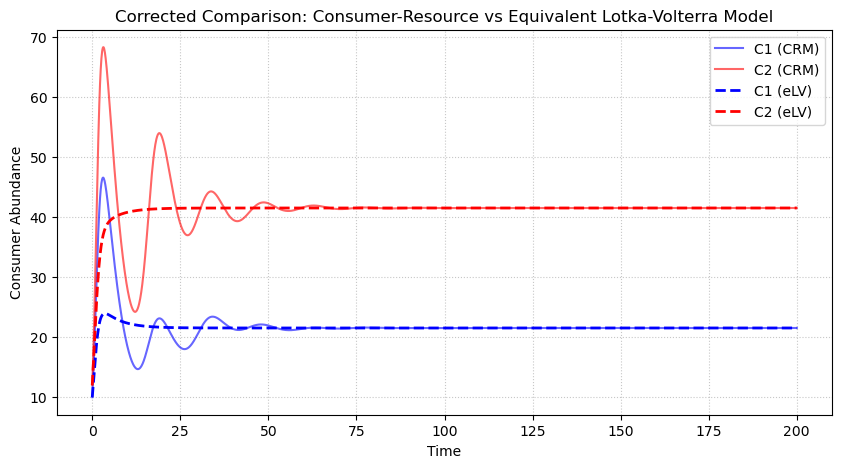

In [26]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# --- 1. Parameter Settings ---
# Define all model parameters in a dictionary
params = {
    'r_vec': np.array([1.0, 1.2]),       # Intrinsic growth rates of resources
    'K_vec': np.array([100.0, 120.0]),   # Carrying capacities of resources
    'a': np.array([                      # Consumption rate matrix (for resource equations)
        [0.02, 0.01],                    # Consumer 1's consumption rates for resources 1 & 2
        [0.01, 0.02]                     # Consumer 2's consumption rates for resources 1 & 2
    ]),
    'w': np.array([                      # Contribution matrix (for consumer equations)
        [0.01, 0.003],                   # Resource 1's contribution to consumer 1 & 2
        [0.003, 0.01]                    # Resource 2's contribution to consumer 1 & 2
    ]),
    'm': np.array([0.2, 0.2])            # Mortality rates of consumers
}

# --- 2. Original Consumer-Resource Model (C-R Model) ---
def cr_model(state, t, p):
    """
    Original consumer-resource dynamics.
    
    Args:
        state: Vector of state variables [R1, R2, C1, C2]
        t: Time (for compatibility with odeint)
        p: Dictionary of parameters
        
    Returns:
        dydt: Derivatives [dR1/dt, dR2/dt, dC1/dt, dC2/dt]
    """
    # Split state into resources and consumers
    R = state[:2]   # Resource abundances
    C = state[2:]   # Consumer abundances
    
    # Resource dynamics: logistic growth minus consumption
    # dR/dt = r*R*(1-R/K) - R * sum(a_i * C_i)
    dRdt = p['r_vec'] * R * (1 - R/p['K_vec']) - R * (p['a'].T @ C)
    
    # Consumer dynamics: gain from resources minus mortality
    # dC/dt = C * (sum(w_ia * R_a) - m_i)
    dCdt = C * (p['w'] @ R - p['m'])
    
    # Concatenate derivatives
    return np.concatenate([dRdt, dCdt])

# --- 3. Calculate Corrected ELV Parameters ---
def calculate_elv_params(p):
    """
    Compute effective parameters for the Equivalent Lotka-Volterra model.
    
    Args:
        p: Dictionary of original model parameters
        
    Returns:
        r_eff: Effective growth rates for ELV model
        alpha: Effective interaction matrix for ELV model
    """
    # Effective intrinsic growth rates:
    # r_i = sum_alpha(w_ia * K_alpha) - m_i
    r_eff = p['w'] @ p['K_vec'] - p['m']
    
    # Compute the interaction matrix alpha
    num_consumers = len(p['m'])
    alpha = np.zeros((num_consumers, num_consumers))
    
    # Calculate competition coefficients:
    # alpha_ij = - sum_alpha(w_ia * a_ja * K_alpha / r_alpha)
    for i in range(num_consumers):
        for j in range(num_consumers):
            # Key correction: consumer i's w (benefit) with consumer j's a (consumption)
            val = (p['w'][i,:] * p['a'][j,:] * p['K_vec']) / p['r_vec']
            alpha[i,j] = -np.sum(val)
            
    return r_eff, alpha

# --- 4. Effective Lotka-Volterra Model (ELV Model) ---
def elv_model(C, t, r_eff, alpha):
    """
    Equivalent Lotka-Volterra model for consumer dynamics.
    
    Args:
        C: Consumer abundances [C1, C2]
        t: Time (for compatibility with odeint)
        r_eff: Effective growth rates
        alpha: Effective interaction matrix
        
    Returns:
        dC/dt: Consumer derivatives
    """
    # dC/dt = C * (r_eff + alpha @ C)
    return C * (r_eff + alpha @ C)

# --- 5. Run Simulations ---
# Time array for simulation
t = np.linspace(0, 200, 2000)

# Initial state: [R1, R2, C1, C2]
state0 = [100.0, 120.0, 10.0, 12.0]

# Simulate original consumer-resource model
sol_cr = odeint(cr_model, state0, t, args=(params,))
C_cr = sol_cr[:, 2:]  # Extract consumer dynamics

# Calculate ELV parameters and simulate
r_eff, alpha = calculate_elv_params(params)
C_elv = odeint(elv_model, state0[2:], t, args=(r_eff, alpha))

# --- 6. Plot Comparison ---
plt.figure(figsize=(10, 5))

# Plot original model results
plt.plot(t, C_cr[:, 0], 'b-', label='C1 (CRM)', alpha=0.6)
plt.plot(t, C_cr[:, 1], 'r-', label='C2 (CRM)', alpha=0.6)

# Plot ELV approximation results
plt.plot(t, C_elv[:, 0], 'b--', label='C1 (eLV)', linewidth=2)
plt.plot(t, C_elv[:, 1], 'r--', label='C2 (eLV)', linewidth=2)

plt.xlabel('Time')
plt.ylabel('Consumer Abundance')
plt.title('Corrected Comparison: Consumer-Resource vs Equivalent Lotka-Volterra Model')
plt.legend()
plt.grid(True, linestyle=':', alpha=0.7)
plt.show()


It is clear that the eLV model is simpler than CRM, but eLV model can accurately reproduce the equilibrium state of CRM. Therefore, we can use the eLV model to analyze the interactions between consumers after the system reaches the equilibrium.

## Leakage
Leakage represents inefficiencies or resource recycling processes that occur in ecological systems. To incorporate leakage into the consumer-resource model, we need to account for the fraction of resources consumed by a consumer that is not fully converted into biomass for the consumer but instead "leaks" back into the resource pool or into another resource. Clearly, the leakage will further enhance interaction among consumers.

### Including Leakage in Consumer Dynamics

Leakage is incorporated by assuming that:
- A portion of the consumed resource $R_\alpha $ by consumer $ C_i $ is not converted into biomass but is instead "leaked" into other resource pools $ R_\beta $, where $ \alpha \neq \beta $.
- The leakage is defined by a leakage matrix $ l^i_{\alpha \beta} $, where $ l^i_{\alpha \beta} $ represents the fraction of resource $ R_\alpha $ consumed by consumer $ C_i $ that leaks into resource $ R_\beta $. We can also view $ l^i_{\alpha \beta} $ as the ability of consumer $i$ to transform resource $\alpha$ into resource $\beta$.

Thus, the effective resource contribution to the growth of consumer $ C_i $ becomes:

$$
u_{i\alpha} (1 - \sum_\beta l^i_{\alpha \beta}) R_\alpha,
$$

where $ u_{i\alpha} $ replaces $ w_{i\alpha}$ to describe uptake rate of $ C_i $ for resource $ r_\alpha $. The term $ (1 - \sum_\beta l^i_{\alpha \beta}) $ ensures that only the fraction of the resource not leaked contributes to the consumer's growth.


With leakage included, the consumer dynamics become:

$$
\frac{dC_i}{dt} = C_i \left( \sum_\alpha u_{i\alpha} (1 - \sum_\beta l^i_{\alpha \beta}) R_\alpha - m_i \right).
$$

- $ \sum_\alpha u_{i\alpha} (1 - \sum_\beta l^i_{\alpha \beta}) R_\alpha $: The effective growth rate of consumer $ C_i $, considering the resource uptake $ u_{i\alpha} R_\alpha $ minus the leaked fraction $ \sum_\beta l^i_{\alpha \beta} $.
- $ m_i $: mortality rate of consumer $ C_i $.

### Including Leakage in Resource Dynamics

When leakage is included, we must account for two effects:
- Depletion by Consumption: resource $ R_\alpha $ is still depleted by consumer $ C_i $ at a rate $ C_i u_{i\alpha} R_\alpha $.
- Return via Leakage: A fraction of other consumed resources $ R_\beta $ (where $ \beta \neq \alpha $) leaks into $ R_\alpha $ at a rate proportional to $ l^i_{\beta \alpha} $. This will supplement the resource $\alpha$. The total leakage into $ R_\alpha $ is given by:

$$
\sum_\beta C_i u_{i\beta} R_\beta l^i_{\beta \alpha},
$$

where $ \beta $ runs over all other resources.



Combining these effects, the resource dynamics become:

$$
\frac{dR_\alpha}{dt} = \rho_\alpha (R_{\alpha}) - \sum_{i} \left( C_i u_{i\alpha} R_\alpha - \sum_{\beta} C_i u_{i\beta} R_\beta l^i_{\beta \alpha} \right).
$$

- $ \rho_\alpha (R_{\alpha}) $: To simplify equations, we use a function $ \rho (\cdot)$ to replace the intrinsic dynamic of resource $ R_\alpha $. (If we refer back to the previous sections, $ \rho_\alpha (R_{\alpha}) $ should be $r_\alpha(1-\frac{R_\alpha}{K_\alpha})R_\alpha$, but by symbolizing it, we can use a simpler equation to describe the intrinsic changes in resources.)
- $ - \sum_i C_i u_{i\alpha} R_\alpha $: Depletion of resource $ r_\alpha $ due to consumption by all consumers.
- $ + \sum_i \sum_\beta C_i u_{i\beta} R_\beta l^i_{\beta \alpha} $: Gain in $ R_\alpha $ from leakage contributions of other resources $ R_\beta $.

### Final Form

By combining the updated consumer and resource dynamics, the final model with leakage becomes:

$$
\begin{aligned}& \frac{dC_i}{dt} = C_i \left( \sum_\alpha u_{i\alpha}(1-\sum_\beta l^i_{\alpha \beta})R_\alpha - m_i \right),\\& \frac{dR_\alpha}{dt} = \rho_\alpha (R_\alpha) - \sum_{i} \left(C_i u_{i\alpha} R_\alpha - \sum_{\beta} C_i u_{i\beta} R_\beta l^i_{\beta \alpha} \right) .\end{aligned}
$$

Generally, leakages are more common in microbial community dynamics, therefore we refer to this CRM as Microbial Consumer-Resource Model (MiCRM).

### Key Features and Explanations:

- Leakage Matrix $ l^i_{\alpha \beta} $:

   $ l^i_{\alpha \beta} $ determines how much of resource $ R_\alpha $ consumed by $ C_i $ is leaked into resource $ R_\beta $. It is critical for describing resource recycling and feedback loops in ecosystems.

- consumer Dynamics:

   consumer growth is reduced by leakage, as only a fraction of the consumed resources $ (1 - \sum_\beta l^i_{\alpha \beta}) $ contributes to the consumer's biomass.

- resource Dynamics:

   resource pools are interconnected via leakage. resources can gain from the leakage of other resources, creating complex interactions and potential stabilization mechanisms in ecosystems.

- Ecological Implications:

   The inclusion of leakage allows the model to simulate nutrient cycling, detritus feeding, or other real-world ecological processes where energy and matter are not perfectly transferred between trophic levels.

This extended model provides a more realistic representation of ecological systems by incorporating inefficiencies and feedbacks in resource consumption.

### A simple example

Let's add leakage for above "2 consumers - 2 resources" model and simulate the model by Python! The parameters are given as below. Please note that in the code below, we consider resources to be a constant input to the system to simplify computation; that is, $\rho$ is a constant, and we no longer use the logistic model as before.

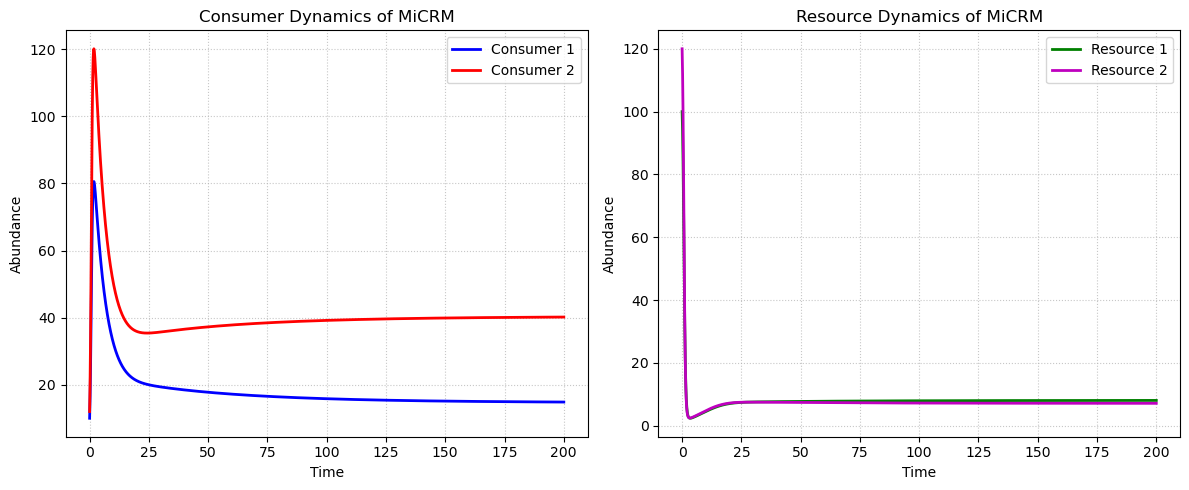

In [14]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# --- 1. Parameter Settings ---
params = {
    'N': 2,  # Number of consumers
    'M': 2,  # Number of resources
    
    # Consumer parameters
    'u': np.array([      # Uptake rates (N x M)
        [0.02, 0.01],    # Consumer 1's uptake of resources 1 and 2
        [0.01, 0.02]     # Consumer 2's uptake of resources 1 and 2
    ]),
    'm': np.array([0.2, 0.2]),  # Mortality rates of consumers
    
    # Resource parameters (constant input)
    'rho': np.array([5.0, 6.0]),  # Constant resource input rates
    
    # Leakage parameters (N x M x M)
    'l': np.array([
        # Consumer 1's leakage matrix
        [[0.1, 0.05],   # From resource 1: 10% to R1, 5% to R2 (total 15%)
         [0.03, 0.1]],  # From resource 2: 3% to R1, 10% to R2 (total 13%)
        
        # Consumer 2's leakage matrix  
        [[0.08, 0.04],  # From resource 1: 8% to R1, 4% to R2 (total 12%)
         [0.02, 0.08]]  # From resource 2: 2% to R1, 8% to R2 (total 10%)
    ])
}

# --- 2. Leakage Consumer-Resource Model ---
def MiCRM_ode(y, t, p):
    """
    Consumer-resource model with leakage and constant resource input.
    
    Args:
        y: State vector [C1, C2, ..., R1, R2, ...]
        t: Time
        p: Dictionary of parameters
        
    Returns:
        dydt: Derivatives [dC1/dt, dC2/dt, ..., dR1/dt, dR2/dt, ...]
    """
    N, M = p['N'], p['M']
    C = y[:N]   # Consumer abundances
    R = y[N:]   # Resource abundances
    
    # Initialize derivatives
    dCdt = np.zeros(N)
    dRdt = np.zeros(M)
    
    # Calculate consumer dynamics
    for i in range(N):
        effective_uptake = 0.0
        for alpha in range(M):
            # Fraction of resource alpha that consumer i actually assimilates
            assimilated_fraction = 1.0 - np.sum(p['l'][i, alpha, :])
            effective_uptake += p['u'][i, alpha] * assimilated_fraction * R[alpha]
        dCdt[i] = C[i] * (effective_uptake - p['m'][i])
    
    # Calculate resource dynamics
    for alpha in range(M):
        # Constant resource input
        rho_alpha = p['rho'][alpha]
        dRdt[alpha] = rho_alpha
        
        # Direct consumption by consumers (negative term)
        consumption = 0.0
        for i in range(N):
            consumption += C[i] * R[alpha] * p['u'][i, alpha]
        dRdt[alpha] -= consumption
        
        # Leakage from other resources (positive term)
        leakage = 0.0
        for i in range(N):
            for beta in range(M):
                leakage += C[i] * R[beta] * p['u'][i, beta] * p['l'][i, beta, alpha]
        dRdt[alpha] += leakage
    
    return np.concatenate([dCdt, dRdt])

# --- 3. Run Simulation ---
t = np.linspace(0, 200, 2000)
state0 = np.concatenate([[10.0, 12.0], [100.0, 120.0]])  # [C1, C2, R1, R2]
solution = odeint(MiCRM_ode, state0, t, args=(params,))

# Extract results
C1 = solution[:, 0]  # Consumer 1
C2 = solution[:, 1]  # Consumer 2
R1 = solution[:, 2]  # Resource 1
R2 = solution[:, 3]  # Resource 2

# --- 4. Plot Time Dynamics ---
plt.figure(figsize=(12, 5))

# Plot consumer dynamics
plt.subplot(1, 2, 1)
plt.plot(t, C1, 'b-', label='Consumer 1', linewidth=2)
plt.plot(t, C2, 'r-', label='Consumer 2', linewidth=2)
plt.xlabel('Time')
plt.ylabel('Abundance')
plt.title('Consumer Dynamics of MiCRM')
plt.legend()
plt.grid(True, linestyle=':', alpha=0.7)

# Plot resource dynamics
plt.subplot(1, 2, 2)
plt.plot(t, R1, 'g-', label='Resource 1', linewidth=2)
plt.plot(t, R2, 'm-', label='Resource 2', linewidth=2)
plt.xlabel('Time')
plt.ylabel('Abundance')
plt.title('Resource Dynamics of MiCRM')
plt.legend()
plt.grid(True, linestyle=':', alpha=0.7)

plt.tight_layout()
plt.show()

## Update the eLV Model with Leakage

The form of the eLV model is still as follows:

$$\frac{dC_i}{dt} = C_i \left(   r_i + \sum_j \alpha_{ij} C_j \right),$$

but the expressions for $r_i$ and $\alpha_{ij}$ derived from MiCRM have changed as:

$$\alpha_{ij} = \sum_\gamma u_{i \gamma}(1 - \sum_\beta l^i_{\gamma\beta}) \frac{\partial \hat{R}_\gamma}{\partial C_j},$$

$$r_i = - \sum_j \alpha_{ij} \hat{C}_j.$$

We can easily see that after taking leakage into account, the eLV model becomes rather complex, which requires us to know the equilibrium point of the system in advance. Therefore, in practical simulation, we need to first solve the MiCRM to obtain the equilibrium point before calculating the parameters $r_i$ and $alpha_{ij}$ in the eLV model.


### Code example

We consider a system with "two consumers and two resources" and a constant external resource supply ($\rho$ is no longer a logistic model, but a constant).

Equilibrium Resource Abundances: [4.8016641  2.71399046]
Equilibrium Consumer Abundances: [38.93304345 71.06695364]
Effective growth rates (r_eff): [0.09999981 0.10000011]
Interaction matrix (Alpha):
[[-0.00170283 -0.00047425]
 [-0.00047425 -0.00114731]]


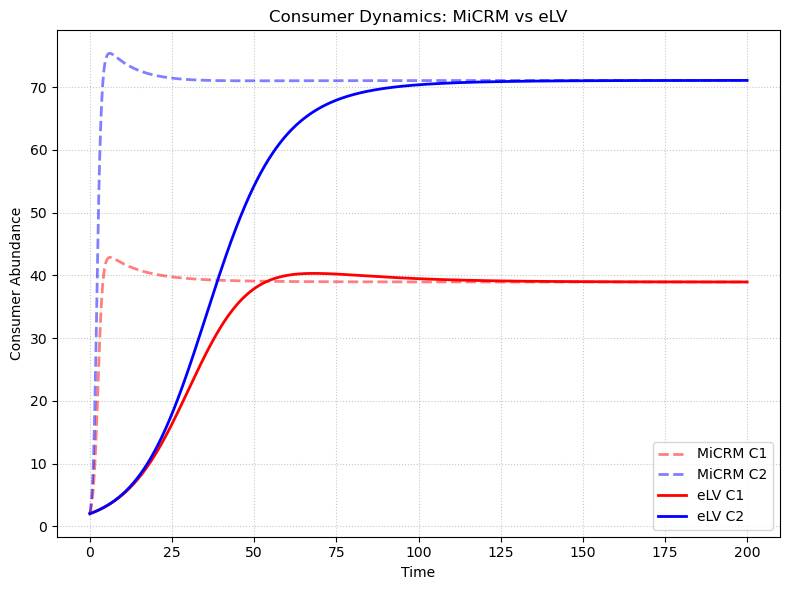

In [25]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# ===================== 1. PARAMETER DEFINITION =====================
# Dimensions: N = number of consumers, M = number of resources
N, M = 2, 2

# Define all parameters in a single dictionary
params = {
    'N': 2,  # Number of consumers
    'M': 2,  # Number of resources
    
    # Consumer parameters
    'u': np.array([      # Uptake rates (N x M)
        [0.03, 0.005],   # Consumer 1: mainly eats resource 1
        [0.005, 0.04]    # Consumer 2: mainly eats resource 2
    ]),
    'm': np.array([0.1, 0.1]),  # Mortality rates of consumers
    
    # Resource parameters (constant input)
    'rho': np.array([5.0, 6.0]),  # Constant resource input rates
    
    # Leakage parameters (N x M x M)
    'l': np.array([
        # Consumer 1's leakage matrix
        [[0.0, 0.4],   # From resource 1: 0% to R1, 40% to R2
         [0.0, 0.0]],  # From resource 2: 0% to R1, 0% to R2
        
        # Consumer 2's leakage matrix  
        [[0.0, 0.0],   # From resource 1: 0% to R1, 0% to R2
         [0.3, 0.0]]   # From resource 2: 30% to R1, 0% to R2
    ])
}

# ===================== 2. DEFINE MiCRM =====================
def micrm_ode(state, t, p):
    """
    MiCRM with constant resource input and cross-feeding leakage.
    
    Args:
        state: Vector containing [R1, R2, ..., C1, C2, ...]
        t: Time variable (for compatibility with odeint)
        p: Dictionary of parameters
        
    Returns:
        Derivatives d[R, C]/dt
    """
    # Split state into resource and consumer components
    R = state[:p['M']]  # Resource abundances
    C = state[p['M']:]  # Consumer abundances
    
    # --- Resource dynamics ---
    # Constant input for resources (no logistic growth)
    dRdt = p['rho'].copy()
    
    # Consumption term: -sum_i (C_i * u_ia * R_a)
    consumption = np.sum(C[:, None] * p['u'] * R[None, :], axis=0)
    
    # Leakage gain term: +sum_i sum_beta (C_i * u_ib * R_b * l_iba)
    leakage_gain = np.einsum('i, ib, b, iba -> a', C, p['u'], R, p['l'])
    
    dRdt += -consumption + leakage_gain
    
    # --- Consumer dynamics ---
    # Calculate net conversion efficiency for each consumer-resource pair
    # e_ia = u_ia * (1 - sum_beta l^i_ab)
    total_leakage_fraction = np.sum(p['l'], axis=2)  # Shape (N, M)
    e = p['u'] * (1 - total_leakage_fraction)  # Net conversion efficiency
    
    # Consumer growth rate: sum_alpha e_ia * R_alpha
    growth = np.sum(e * R[None, :], axis=1)
    dCdt = C * (growth - p['m'])
    
    return np.concatenate([dRdt, dCdt])

# ===================== 3. SOLVE MiCRM =====================
# Time array for simulation
t_cr = np.linspace(0, 200, 2000)

# Initial state: [R1, R2, C1, C2]
state0 = np.array([50.0, 50.0, 2.0, 2.0])

# Solve mechanistic C-R model
sol_cr = odeint(micrm_ode, state0, t_cr, args=(params,))

# Extract equilibrium values (final time point)
R_eq = sol_cr[-1, :M]
C_eq = sol_cr[-1, M:]

print("Equilibrium Resource Abundances:", R_eq)
print("Equilibrium Consumer Abundances:", C_eq)

# ===================== 4. CALCULATE ELV PARAMETERS =====================
def calculate_elv_params(R_star, C_star, p):
    """
    Calculate parameters for the elv model.
    
    Args:
        R_star: Equilibrium resource abundances
        C_star: Equilibrium consumer abundances
        p: Parameter dictionary
        
    Returns:
        r_eff: Intrinsic growth rates for ELV
        Alpha: Interaction matrix for ELV
    """
    # --- 1. Jacobian matrix D (M × M) for resource dynamics ---
    # With constant resource input, the derivative of supply with respect to R is 0
    # D_alpha_gamma = d(F_alpha)/dR_gamma
    
    # Initialize D with zeros
    D = np.zeros((p['M'], p['M']))
    
    # Fill diagonal terms: -sum_i (C_i * u_i_alpha)
    # This comes from the derivative of the consumption term with respect to R_alpha
    consumption_deriv = np.sum(C_star[:, None] * p['u'], axis=0)
    for alpha in range(p['M']):
        D[alpha, alpha] -= consumption_deriv[alpha]
    
    # Add leakage contributions
    # For D[alpha, gamma]: + sum_i C_i * u_i_gamma * l_i_gamma_alpha
    # This is the derivative of leakage gain term with respect to R_gamma
    for alpha in range(p['M']):
        for gamma in range(p['M']):
            leakage_contrib = np.sum(C_star * p['u'][:, gamma] * p['l'][:, gamma, alpha])
            D[alpha, gamma] += leakage_contrib
    
    # --- 2. Impact matrix V (M × N): d(F_alpha)/d(C_j) ---
    V = np.zeros((p['M'], p['N']))
    
    for alpha in range(p['M']):
        for j in range(p['N']):
            # Term 1: -u_j_alpha * R_alpha (from consumption)
            V[alpha, j] -= p['u'][j, alpha] * R_star[alpha]
            
            # Term 2: sum_beta u_j_beta * R_beta * l_j_beta_alpha (from leakage)
            leakage_sum = 0.0
            for beta in range(p['M']):
                leakage_sum += p['u'][j, beta] * R_star[beta] * p['l'][j, beta, alpha]
            V[alpha, j] += leakage_sum
    
    # --- 3. Net conversion efficiency matrix E (N × M) ---
    total_leakage_fraction = np.sum(p['l'], axis=2)
    E = p['u'] * (1 - total_leakage_fraction)
    
    # --- 4. Compute Alpha = -E * D^(-1) * V ---
    D_inv = np.linalg.inv(D)
    Alpha = -E @ D_inv @ V
    
    # --- 5. Compute effective intrinsic growth rates r ---
    # Growth at equilibrium: sum_alpha e_ia * R_alpha
    growth_at_eq = np.sum(E * R_star, axis=1)
    r_eff = growth_at_eq - p['m'] - Alpha @ C_star
    
    return r_eff, Alpha

# Calculate ELV parameters using equilibrium values
r_eff, Alpha = calculate_elv_params(R_eq, C_eq, params)


# ===================== 5. DEFINE AND SOLVE ELV MODEL =====================
def elv_model(C, t, r, alpha):
    """
    Equivalent Lotka-Volterra model for consumer dynamics.
    
    Args:
        C: Consumer abundances
        t: Time variable (for compatibility with odeint)
        r: Effective intrinsic growth rates
        alpha: Effective interaction matrix
        
    Returns:
        dC/dt for ELV model
    """
    return C * (r + alpha @ C)

# Use same time array for ELV simulation
t_elv = t_cr

# Use initial consumer abundances of MiCRM as initial condition for ELV model
C_start_elv = state0[M:]

# Solve ELV model
sol_elv = odeint(elv_model, C_start_elv, t_elv, args=(r_eff, Alpha))

# Print r and alpha
print("Effective growth rates (r_eff):", r_eff)
print("Interaction matrix (Alpha):")
print(Alpha)

# ===================== 6. PLOT COMPARISON =====================
plt.figure(figsize=(8, 6))

# Plot consumer dynamics comparison
# Plot MiCRM consumers (semi-transparent)
plt.plot(t_cr, sol_cr[:, M], 'r--', linewidth=2, alpha=0.5, label='MiCRM C1')
plt.plot(t_cr, sol_cr[:, M+1], 'b--', linewidth=2, alpha=0.5, label='MiCRM C2')

# Plot ELV model consumers (opaque)
plt.plot(t_elv, sol_elv[:, 0], 'r-', linewidth=2, alpha=1.0, label='eLV C1')
plt.plot(t_elv, sol_elv[:, 1], 'b-', linewidth=2, alpha=1.0, label='eLV C2')
plt.title('Consumer Dynamics: MiCRM vs eLV')
plt.xlabel('Time')
plt.ylabel('Consumer Abundance')
plt.legend()
plt.grid(True, linestyle=':', alpha=0.7)

plt.tight_layout()
plt.show()

From the simulation, it is evident that we have successfully transformed the MiCRM into the eLV model. This now allows us to analyze the consumer behavior of the entire system (the direction of the intrinsic growth rate vector) and the interactions among consumers (by analyzing the interaction coefficient matrix).